In [1]:
#part of the code is from Adil Moujahid's blog
# http://adilmoujahid.com/posts/2014/07/twitter-analytics/


import json
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
tweets_data_path = 'C:\\Users\\Haijin\\DataScience\\twitter\\output.txt'
tweets_data = []
tweets_file = open(tweets_data_path, "rb")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        #print(tweet.get("text"))
        tweets_data.append(tweet)
    except:
        continue

In [ ]:
#to get "russia" related Trump tweets, and analyze the sentiment
#as this is a hot topic recently.

In [2]:
def getSentiment(tweet):
    a=TextBlob(tweet)
    p=a.sentiment.polarity
    if p>0:
        return 1
    elif p<0:
        return -1
    else: return 0
    

In [3]:
tweets = pd.DataFrame()


In [6]:
import re
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [7]:
tweets['text'] = list(map(lambda tweet:tweet.get("text","null"), tweets_data))
tweets['russia'] = tweets['text'].apply(lambda tweet: word_in_text('russia', tweet))
tweets['sentiment']=list(map(lambda tweet:getSentiment(tweet.get("text","null")), tweets_data))

In [15]:
tweets2=tweets.query('russia==True')

In [16]:
tweets2.shape

(316, 3)

In [14]:
tweets2.head()

,text,russia,sentiment
20,RT @RBSNETWORKS: John McCain faces questions i...,True,0
43,RT @SethAbramson: Pass it on: in the coming we...,True,0
45,"RT @FoxNews: On “Justice,"" @JudgeJeanine said ...",True,0
59,RT @NoFascistLies: After news that Mueller iss...,True,1
68,RT @ThomasWictor: @ToddHeadleeAZ @SeattleJen42...,True,-1


In [12]:
tweets2['sentiment'].value_counts().plot(kind='bar')

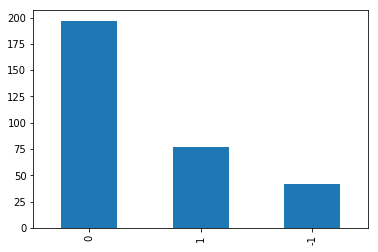

In [13]:
plt.show()

In [ ]:
#similar result as the total data set.